# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



## Iris Flower dataset

Toy  Dataset: Iris Dataset: [https://en.wikipedia.org/wiki/Iris_flower_data_set]
* A simple dataset to learn the basics.
* 3 flowers of Iris species. [see images on wikipedia link above]
* 1936 by Ronald Fisher.
* Petal and Sepal: http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg
*  Objective: Classify a new flower as belonging to one of the 3 classes given the 4 features.
* Importance of domain knowledge.
* Why use petal and sepal dimensions as features?
* Why do we not use 'color' as a feature?



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

'''downlaod iris.csv from https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv'''
#Load Iris.csv into a pandas dataFrame.
iris = pd.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
# (Q) how many data-points and features?
print (iris.shape)

(150, 5)


In [6]:
#(Q) What are the column names in our dataset?
print (iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [7]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?

iris["species"].value_counts()
# balanced-dataset vs imbalanced datasets
#Iris is a balanced dataset as the number of data points for every class is 50.

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

# (3.2) 2-D Scatter Plot

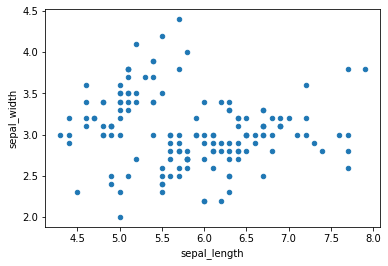

In [8]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

iris.plot(kind='scatter', x='sepal_length', y='sepal_width') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

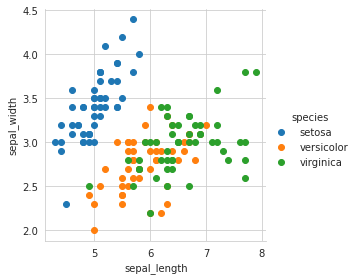

In [9]:
# 2-D Scatter plot with color-coding for each flower type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(iris, hue="species", height=4) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend();
plt.show();

# Notice that the blue points can be easily seperated 
# from red and green by drawing a line. 
# But red and green data points cannot be easily seperated.
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 4C2 = 6.

**Observation(s):**
1. Using sepal_length and sepal_width features, we can distinguish Setosa flowers from others.
2. Seperating Versicolor from Viginica is much harder as they have considerable overlap.

## 3D Scatter plot

https://plot.ly/pandas/3d-scatter-plots/

Needs a lot to mouse interaction to interpret data.

What about 4-D, 5-D or n-D scatter plot?

#  (3.3) Pair-plot

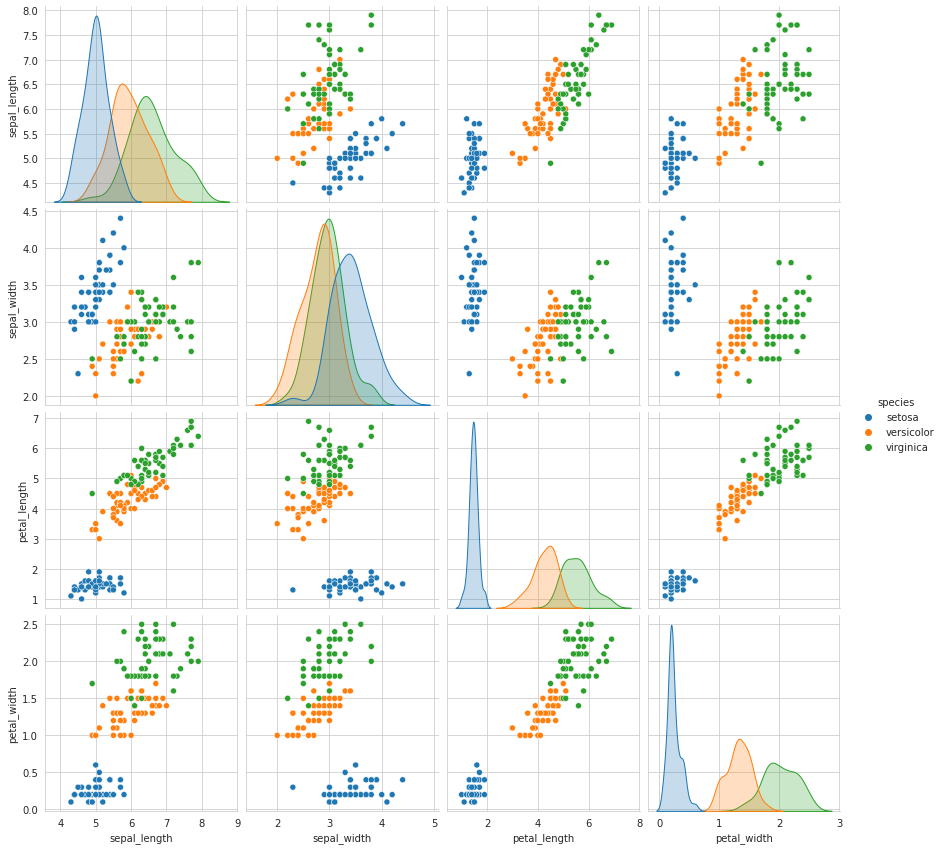

In [10]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Cannot be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. petal_length and petal_width are the most useful features to identify various flower types.
2. While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# (3.4) Histogram, PDF, CDF

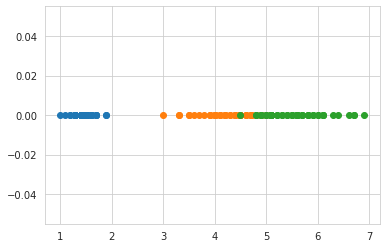

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
iris_setosa     = iris.loc[iris["species"] == "setosa"];
iris_virginica  = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.

#Are there better ways of visualizing 1-D scatter plots?

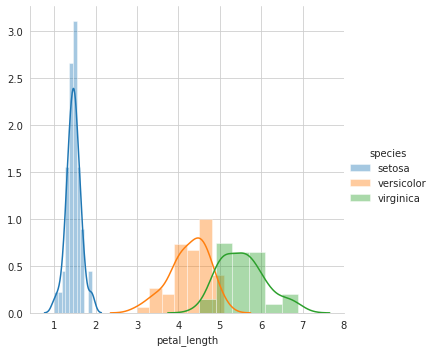

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_length") \
   .add_legend();
plt.show();

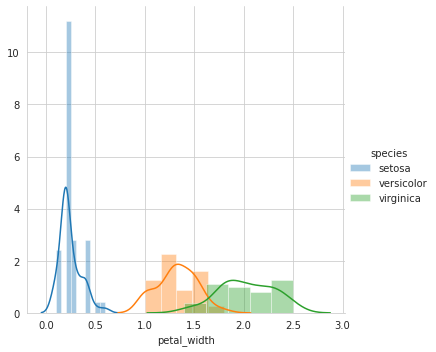

In [13]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "petal_width") \
   .add_legend();
plt.show();

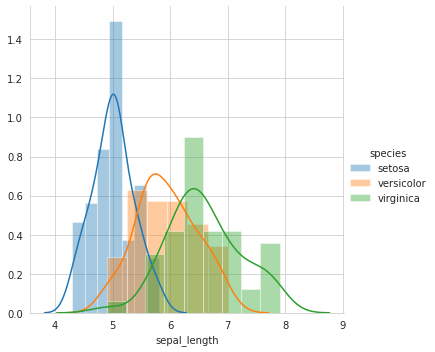

In [14]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_length") \
   .add_legend();
plt.show();

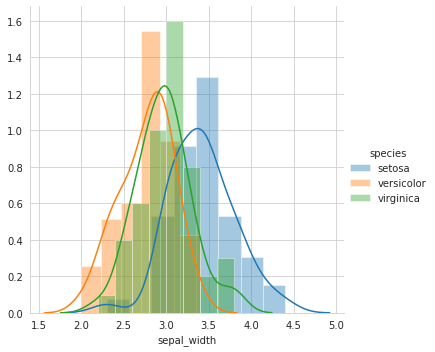

In [15]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(sns.distplot, "sepal_width") \
   .add_legend();
plt.show();

In [ ]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
## for each value of petal_length, what does the value on y-axis mean?
# Notice that we can write a simple if..else condition as if(petal_length) < 2.5 then flower type is setosa.
# Using just one feature, we can build a simple "model" suing if..else... statements.

# Disadv of PDF: Can we say what percentage of versicolor points have a petal_length of less than 5?

# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


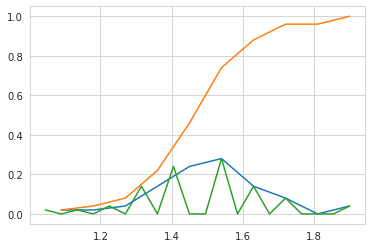

In [16]:

# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 5?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)

pdf = counts/(sum(counts))

print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


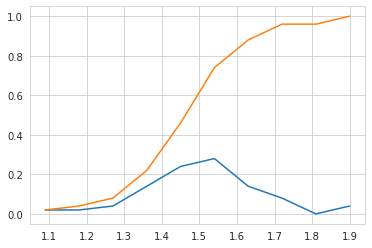

In [17]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


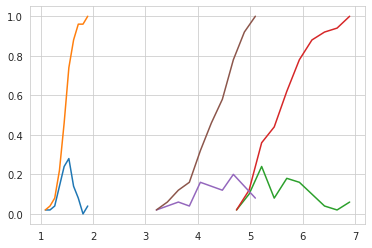

In [18]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# (3.5) Mean, Variance and Std-dev

In [19]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_setosa["petal_length"]))
#Mean with an outlier.
print(np.mean(np.append(iris_setosa["petal_length"],50)));
print(np.mean(iris_virginica["petal_length"]))
print(np.mean(iris_versicolor["petal_length"]))

print("\nStd-dev:");
print(np.std(iris_setosa["petal_length"]))
print(np.std(iris_virginica["petal_length"]))
print(np.std(iris_versicolor["petal_length"]))





Means:
1.464
2.4156862745098038
5.552
4.26

Std-dev:
0.17176728442867115
0.5463478745268441
0.4651881339845204


# (3.6) Median, Percentile, Quantile, IQR, MAD

In [20]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_setosa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_setosa["petal_length"],50)));
print(np.median(iris_virginica["petal_length"]))
print(np.median(iris_versicolor["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_setosa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_setosa["petal_length"],90))
print(np.percentile(iris_virginica["petal_length"],90))
print(np.percentile(iris_versicolor["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_setosa["petal_length"]))
print(robust.mad(iris_virginica["petal_length"]))
print(robust.mad(iris_versicolor["petal_length"]))



Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# (3.7) Box plot and Whiskers

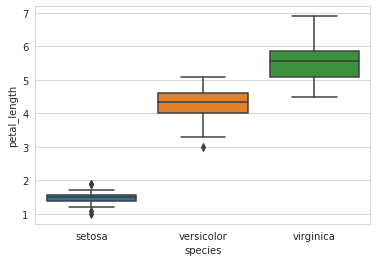

In [21]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

# (3.8) Violin plots

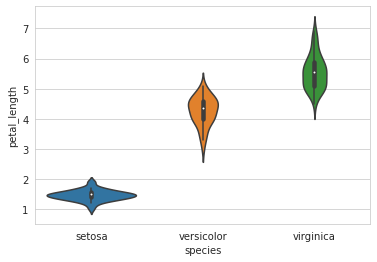

In [22]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="species", y="petal_length", data=iris, size=8)
plt.show()

# (3.9) Summarizing plots in english
* Exaplain your findings/conclusions in plain english
* Never forget your objective (the probelm you are solving) . Perform all of your EDA aligned with your objectives.

# (3.10) Univariate, bivariate and multivariate analysis.

In [ ]:
Def: Univariate, Bivariate and Multivariate analysis.

# (3.11) Multivariate probability density, contour plot.


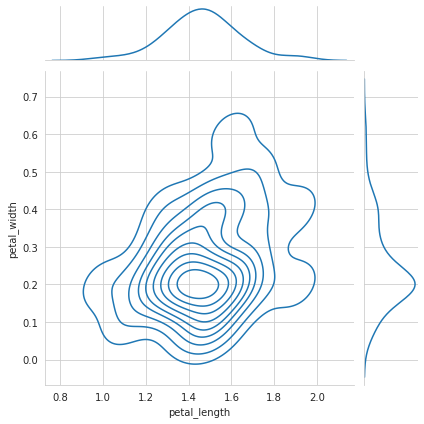

In [23]:
#2D Density plot, contors-plot
sns.jointplot(x="petal_length", y="petal_width", data=iris_setosa, kind="kde");
plt.show();


In [47]:
iris_virginica_SW = iris_virginica.iloc[:,1]
iris_versicolor_SW = iris_versicolor.iloc[:,1]

In [43]:
from scipy import stats
stats.ks_2samp(iris_virginica_SW, iris_versicolor_SW)

Ks_2sampResult(statistic=0.26, pvalue=0.06779471096995852)

In [44]:
x = stats.norm.rvs(loc=0.2, size=10)
stats.kstest(x,'norm')

KstestResult(statistic=0.4783576640329388, pvalue=0.012628609798349191)

In [45]:
x = stats.norm.rvs(loc=0.2, size=100)
stats.kstest(x,'norm')

KstestResult(statistic=0.11802871089493527, pvalue=0.11367667282536612)

In [46]:
x = stats.norm.rvs(loc=0.2, size=1000)
stats.kstest(x,'norm')

KstestResult(statistic=0.10018160086362049, pvalue=3.442473742662677e-09)

# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [2]:
from google.colab import files
files=files.upload()

Saving haberman (2).csv to haberman (2).csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
haberman = pd.read_csv('haberman (2).csv')  # load csv 
print ("\nRows * Cols=", haberman.shape)  # rows, cols
print (haberman.columns)  # cols name 
print ("\nStatus \t #dataponts\n", haberman["status"].value_counts()) # status is dependent variable : 1(patient survived >= 5 years), 2 (patient survived < 5 years)


Rows * Cols= (306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')

Status 	 #dataponts
 1    225
2     81
Name: status, dtype: int64


**Objective** is to find the most useful features using which status can be identified. Based on given features: nodes, age, year we need to find out whether a patient would survive or not. Featrue status = 1(patient survice >= 5 years) or 2 (patient survived < 5 years).

**Bi-variate analysis (scatter plots, pair-plots)**: to see if combinations of features are useful in classfication. For this we use seaborn libraby to get the plot in different colors. 

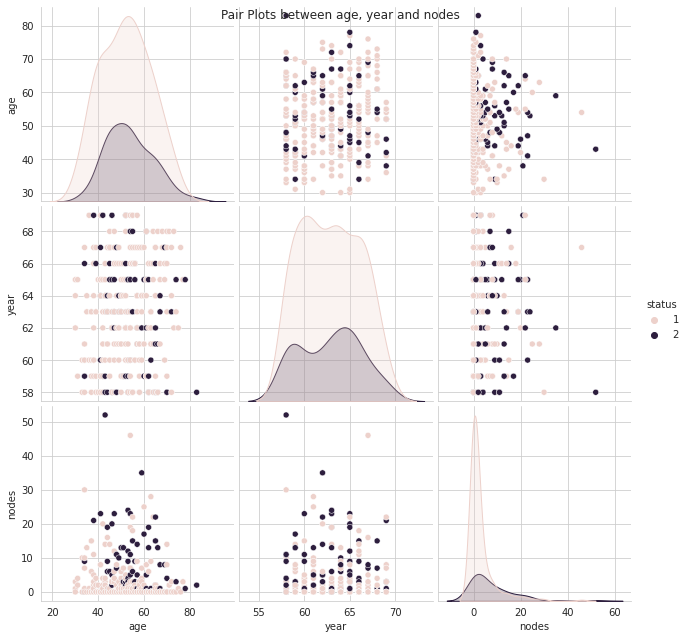

In [51]:
# Pairplot to choose the important features
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="status", height=3, vars=['age','year','nodes']).fig.suptitle("Pair Plots between age, year and nodes")
plt.show()

**Observatoin from Pair Plot:** From above pair plot I will chose Age and Nodes features as the plot is better than other plots in terms of separability. 

Perform **Univaraite analysis(PDF, CDF, Boxplot, Voilin plots)** to understand which features are useful towards classification.

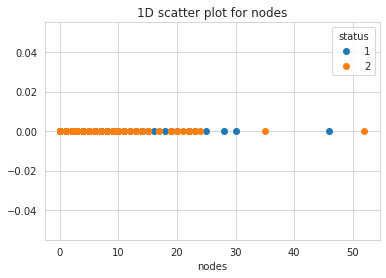

In [54]:
# 1D scatter plot and see if we can distinguish data 
import numpy as np
haberman_Long_Survive = haberman.loc[haberman['status'] == 1];
haberman_Short_Survive = haberman.loc[haberman['status'] == 2];
plt.plot(haberman_Long_Survive['nodes'], np.zeros_like(haberman_Long_Survive['nodes']), 'o', label='1')
plt.plot(haberman_Short_Survive['nodes'], np.zeros_like(haberman_Short_Survive['nodes']), 'o', label='2')
plt.xlabel("nodes")
plt.title("1D scatter plot for nodes")
plt.legend(title="status")
plt.show()

**Observations from 1D scatter plot:** data of short survival status are mostly overlap on long survival status due to which we can't conclude on this data.

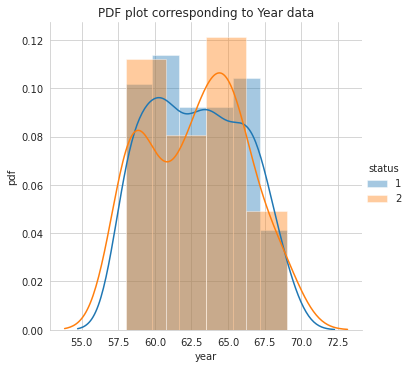

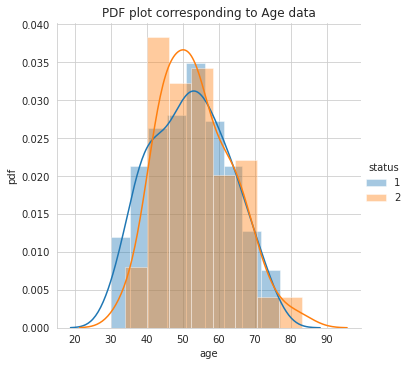

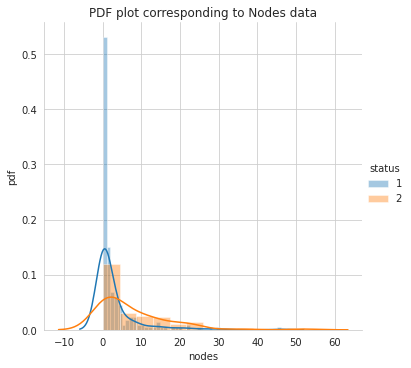

In [55]:
# PDF of all features
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.FacetGrid(haberman, hue="status", height = 5).map(sns.distplot, "year").set_axis_labels('year', 'pdf').add_legend()
plt.title('PDF plot corresponding to Year data')

sns.FacetGrid(haberman, hue="status", height = 5).map(sns.distplot, "age").set_axis_labels('age', 'pdf').add_legend()
plt.title('PDF plot corresponding to Age data')

g= sns.FacetGrid(haberman, hue="status", height = 5).map(sns.distplot, "nodes").set_axis_labels('nodes', 'pdf').add_legend()
plt.title('PDF plot corresponding to Nodes data')
plt.show()

**Observatoin from PDF:** Graph of Year having overlapped data so can't conclude anything from it. Graph of age having overlapped data between age 35 to 75 so its also of no use. Graph of Nodes is overlapped with less values. It has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all. So, I accept the PDF of Axillary nodes and can conclude below result

In [ ]:
if('#nodes' ≤ 0): 
  Patient = Long survival 
elif('#nodes' ≥ 0 && '#nodes' ≤ 3): 
  Patient = Long survival chances are high 
elif('#nodes' ≥ 3) 
  Patient = Short survival

So from above PDF we can say the patients survival status, but we cannot exactly say what percentage of patient will actually short survive or long survive. To know that we have another distribution that is CDF.


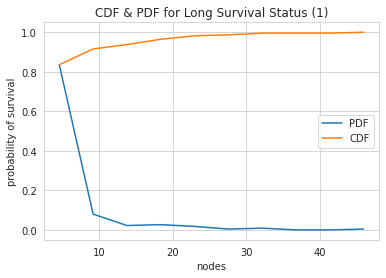

In [58]:
counts, bin_edges = np.histogram(haberman_Long_Survive['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.title("CDF & PDF for Long Survival Status (1)")
plt.xlabel('nodes')
plt.ylabel('probability of survival')
plt.legend()
plt.show()

From above CDF we can observe that orange line shows there is a 85% chance of long survival if number of nodes detected are < 5. From Blue line (pdf), it is observed that, as number of nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes increases >40

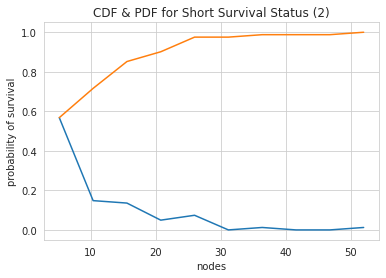

In [59]:
counts, bin_edges = np.histogram(haberman_Short_Survive['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF')
plt.plot(bin_edges[1:], cdf, label='CDF')
plt.xlabel('nodes')
plt.ylabel('probability of survival')
plt.title('CDF & PDF for Short Survival Status (2)')
plt.show();

CDF for Short survival observation is same but in this nearly 55% of people who have nodes less than 5 and there are nearly 100% of people in short survival if nodes are > 40

In [9]:
print("Means:")
print(np.mean(haberman_Long_Survive['nodes']))
print(np.mean(np.append(haberman_Long_Survive['nodes'],50)))
print(np.mean(haberman_Short_Survive['nodes']))
print(np.mean(np.append(haberman_Short_Survive['nodes'],50)))
print("\nStandard Deviations:")
print(np.std(haberman_Long_Survive['nodes']))
print(np.std(haberman_Short_Survive['nodes']))

Means:
2.7911111111111113
3.0
7.45679012345679
7.975609756097561

Standard Deviations:
5.857258449412131
9.128776076761632


**Observation**: for Long survive mean is 2.79 and including outlier it is 3 that is almost same, but the mean of Short survive is 7.4 which is comparatively much higher than Long survive. So the probability for short survive is more in data set.
Standard deviation: Long survive has standard deviation of only 5.85 and Short survive has 9.12, means the spread of data for short survive is more.

In [10]:
print("Medians:")
print(np.median(haberman_Long_Survive["nodes"]))
print(np.median(np.append(haberman_Long_Survive["nodes"],50)))
print(np.median(haberman_Short_Survive["nodes"]))
print("\nQuantiles:")
print(np.percentile(haberman_Long_Survive["nodes"],np.arange(0,100,25)))
print(np.percentile(haberman_Short_Survive["nodes"],np.arange(0,100,25)))
print("\n90th percentile: ")
print(np.percentile(haberman_Long_Survive["nodes"],90))
print(np.percentile(haberman_Short_Survive["nodes"],90))
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Long_Survive["nodes"]))
print(robust.mad(haberman_Short_Survive["nodes"]))

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th percentile: 
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


**Observation** it is clear that average nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 nodes have short survival status.
Quantiles shows that nearly 50th% of nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.
Similarly, In short survival 75th% of patients have minimum 11 nodes detected.
At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

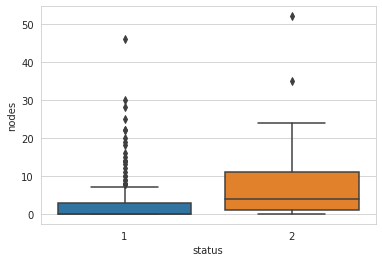

In [14]:
sns.boxplot(x="status", y= "nodes", data=haberman)
plt.show()

**Observation**:In above box whiskers plot, 25th percentile and 50th percentile are nearly same for Long survive and threshold for it is 0 to 7. Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is 0 to 25 nodes and 75th% is 12 and 25th% is 1 or 2.
So, if nodes between 0–7 have chances of error as short survival plot is also lies in it. That is 50% error for Short survival status. There are most of point above 12 lies in Short survival.

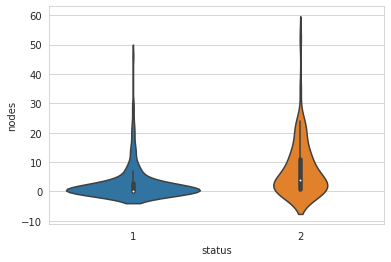

In [15]:
sns.violinplot(x="status", y="nodes",data=haberman)
plt.legend
plt.show()

**Observation**: In above violin plot we observe that density for long survive  is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0–20 and threshold from 0–12

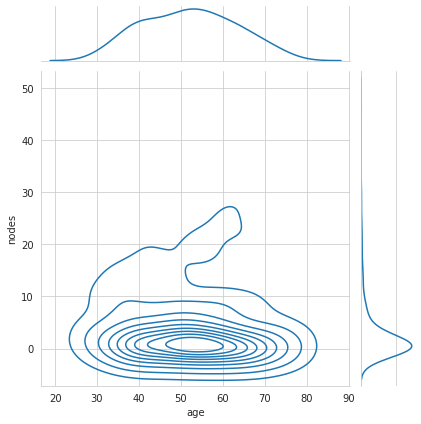

In [17]:
sns.jointplot(x="age", y="nodes", data=haberman_Long_Survive, kind="kde")
plt.grid()
plt.show()

**Observation**: Above is the 2D density plot for long survival using feature age and axillary nodes, it is observed the density of point for long survival is more from age range 47–60 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter. Each shade represent 1 contour plot.